# *PyAF* para previsão de temperatura mensal

*PyAF* é uma biblioteca *Python* de código aberto para previsão automática de séries temporais construída usando bibliotecas tradicionais de *machine learning*.  Dentre os modelos que serão usados nesse projeto, além do modelo padrão, existem os modelos do tipo autorregressivos (AR e ARX), do tipo árvore (XGB, XGBX, LGB, LGBX), redes neurais (MLP e LSTM) e máquinas de vetores de suporte (SVR e SVRX). Essa biblioteca é de fácil uso e aplicação permitindo gerar rapidamente modelos de previsão de séries temporais.

Aqui nesse projeto irei usar uma base de dados de uma série temporal de temperatura mensal, nos Estados Unidos, que vai de Janeiro de 1895 a Janeiro de 2021. Os dados podem ser obtido no [seguinte link](https://www.ncdc.noaa.gov/cag/national/time-series/110/tavg/all/1/1895-2021?base_prd=true&begbaseyear=1901&endbaseyear=2021).

## Importando as bibliotecas

In [291]:
import pyaf.ForecastEngine as autof
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from statsmodels.stats.stattools import jarque_bera
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error

## Importando a base de dados

In [114]:
temperatura = pd.read_csv('110-tavg-all-1-1895-2021.csv')

## Tratamento da base de dados

In [116]:
#convertendo a coluna Date no formato de data
lista = [] #criando uma lista vazia
for i in temperatura.index:
    lista.append(datetime.strptime(str(temperatura['Date'][i]), '%Y%m').strftime('%Y-%m')) #covertendo cada valor de data
    #para o formato ano e mês e adicionando os valores na lista
temperatura['Date']=lista #atribuindo a coluna Date os valores da lista
temperatura['Date'] = pd.to_datetime(temperatura['Date']) #convertendo para a coluna Date para tipo datetime
temperatura = temperatura.drop('Anomaly', axis=1) #excluindo a coluna 'Anomaly'

## Análise dos dados

Visualizando as primeiras observações da base de dados.

In [303]:
temperatura.head()

,Date,Value
0,1895-01-01,26.69
1,1895-02-01,26.60
2,1895-03-01,39.97
3,1895-04-01,52.90
4,1895-05-01,59.94


Visualizando as últimas observações da base de dados.

In [302]:
temperatura.tail()

,Date,Value
1508,2020-09-01,65.93
1509,2020-10-01,54.30
1510,2020-11-01,46.33
1511,2020-12-01,35.73
1512,2021-01-01,34.59


Informações sobre a base de dados.

In [119]:
temperatura.info()
#uma coluna do tipo float64
#uma coluna do tipo datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1513 non-null   datetime64[ns]
 1   Value   1513 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.8 KB


Tabela estatística da base de dados.

In [120]:
temperatura.describe()

,Value
count,1513.000000
mean,52.222042
std,15.357174
min,21.900000
25%,38.030000
50%,52.830000
75%,66.850000
max,76.800000


Dimensão da base de dados : 1513 observações e duas colunas.

In [127]:
temperatura.shape

(1513, 2)

Histograma da distribuição da série temporal.

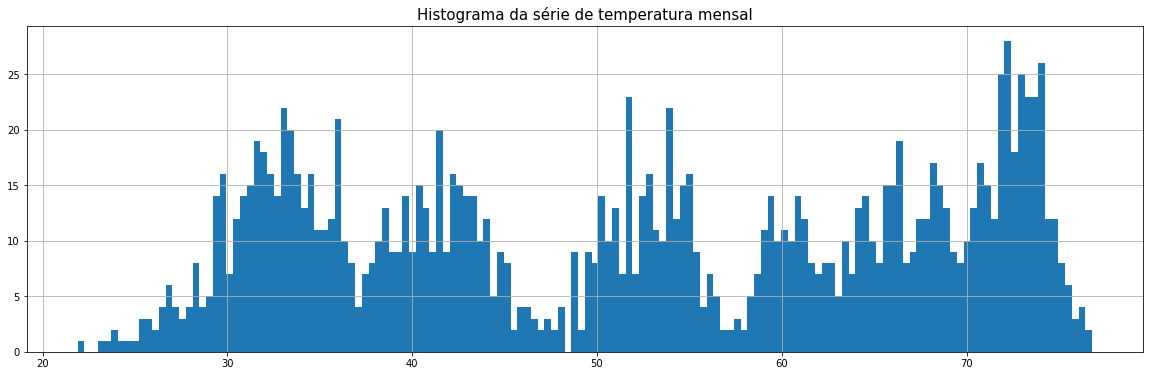

In [306]:
plt.figure(figsize=(20,6))
temperatura['Value'].hist(bins=150)
plt.title('Histograma da série de temperatura mensal', size=15);
#Os dados não apresentam uma distribuição normal

Gerando o gráfico da série temporal.

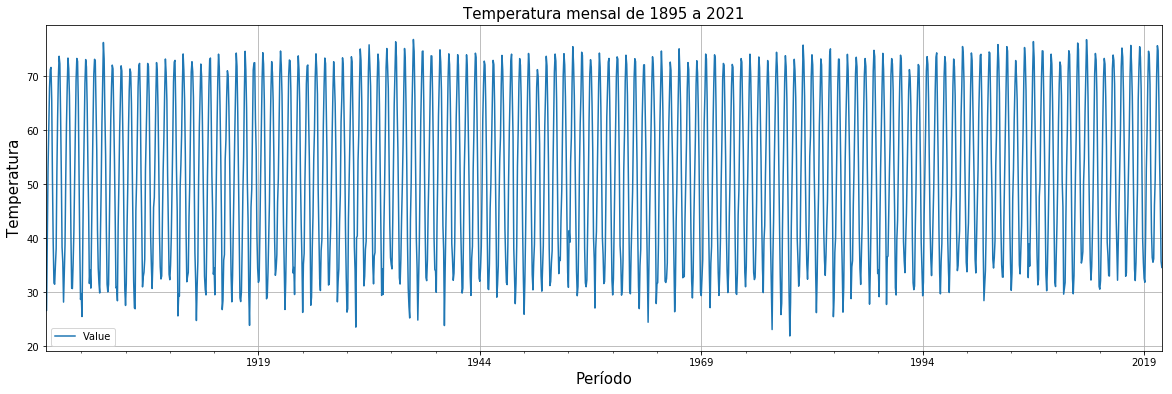

In [122]:
temperatura.plot.line('Date',['Value'], grid=True, figsize=(20,6))
plt.xlabel("Período", size=15)
plt.ylabel("Temperatura",size=15)
plt.title('Temperatura mensal de 1895 a 2021', size=15);
#a série apresenta uma forte presença de sazonalidade e não aparenta
#ter presença de tendência.

## Dados de treino e teste

Separando 1453 observações para o treino dos algoritmos da biblioteca e a base de teste com 60 observações para comparar com as previsões que cada modelo realizará.

In [167]:
temperatura_treino = temperatura[:1453]
temperatura_teste = temperatura[1453:]

Dimensão da base de treino e teste.

In [174]:
print(temperatura_treino.shape)
print(temperatura_teste.shape)

(1453, 2)
(60, 2)


Visualizando a base de treino e de teste no gráfico.

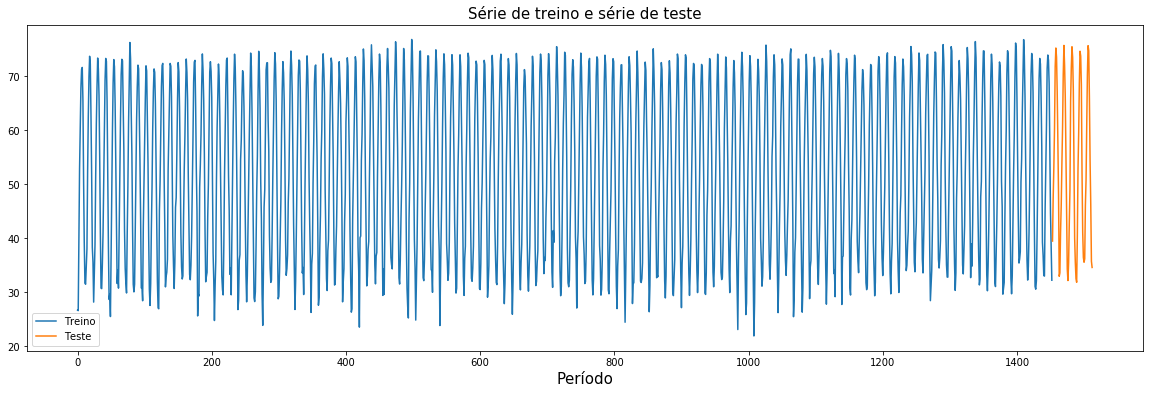

In [308]:
temperatura_treino['Value'].plot(figsize=(20,6))
temperatura_teste['Value'].plot()
plt.title('Série de treino e série de teste',size=15)
plt.xlabel('Período',size=15)
plt.legend(['Treino','Teste']);

## Treinando os modelos

Aqui, além do modelo padrão, irei usar os modelos AR, ARX, SVR, XGB e LGB.

In [261]:
modelo1 = autof.cForecastEngine()
modelo1.train(temperatura_treino , 'Date' , 'Value', 60)

modelo2 = autof.cForecastEngine()
modelo2.mOptions.set_active_autoregressions(['AR'])
modelo2.train(temperatura_treino , 'Date' , 'Value', 60)

modelo3 = autof.cForecastEngine()
modelo3.mOptions.set_active_autoregressions(['ARX'])
modelo3.train(temperatura_treino , 'Date' , 'Value', 60)

modelo4 = autof.cForecastEngine()
modelo4.mOptions.set_active_autoregressions(['SVR'])
modelo4.train(temperatura_treino , 'Date' , 'Value', 60)

modelo5 = autof.cForecastEngine()
modelo5.mOptions.set_active_autoregressions(['XGB'])
modelo5.train(temperatura_treino , 'Date' , 'Value', 60)

modelo6 = autof.cForecastEngine()
modelo6.mOptions.set_active_autoregressions(['LGB'])
modelo6.train(temperatura_treino , 'Date' , 'Value', 60)

INFO:pyaf.std:START_TRAINING 'Value'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['Value']' 10.293167114257812
INFO:pyaf.std:START_TRAINING 'Value'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['Value']' 11.201708555221558
INFO:pyaf.std:START_TRAINING 'Value'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['Value']' 8.4202139377594
INFO:pyaf.std:START_TRAINING 'Value'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['Value']' 22.973156929016113
INFO:pyaf.std:START_TRAINING 'Value'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['Value']' 7.423083305358887
INFO:pyaf.std:START_TRAINING 'Value'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['Value']' 23.046382904052734
INFO:pyaf.std:START_TRAINING 'Value'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['Value']' 13.202463626861572
INFO:pyaf.std:START_TRAINING 'Value'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['Value']' 18.256082773208618
INFO:pyaf.std:START_TRAINING 'Value'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['Value']' 7.937487602233887
INFO:p

## Previsões dos modelos

Gerando 60 previsões para cada modelo.

In [263]:
temperatura_previsao1 = modelo1.forecast(temperatura_treino, 60)
temperatura_previsao2 = modelo2.forecast(temperatura_treino, 60)
temperatura_previsao3 = modelo3.forecast(temperatura_treino, 60)
temperatura_previsao4 = modelo4.forecast(temperatura_treino, 60)
temperatura_previsao5 = modelo5.forecast(temperatura_treino, 60)
temperatura_previsao6 = modelo6.forecast(temperatura_treino, 60)

INFO:pyaf.std:START_FORECASTING '['Value']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Value']' 1.015843391418457
INFO:pyaf.std:START_FORECASTING '['Value']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Value']' 2.6420462131500244
INFO:pyaf.std:START_FORECASTING '['Value']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Value']' 1.1243584156036377
INFO:pyaf.std:START_FORECASTING '['Value']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Value']' 9.731666803359985
INFO:pyaf.std:START_FORECASTING '['Value']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Value']' 1.096374273300171
INFO:pyaf.std:START_FORECASTING '['Value']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Value']' 1.086338996887207
INFO:pyaf.std:START_FORECASTING '['Value']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Value']' 1.0949444770812988
INFO:pyaf.std:START_FORECASTING '['Value']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Value']' 3.39485764503479
INFO:pyaf.std:START_FORECASTING '['Value']'
INFO:pyaf.

## Métricas de avaliação dos modelos

### R² (Coeficiente de determinação)

Essa métrica quanto mais próximo do valor 1 melhor é o desempenho das previsões. O *R²* também pode ser interpretado como a correlação entre as previsões e os valores reaisd e teste.

In [280]:
print('R² do modelo padrão :',r2_score(temperatura_previsao1['Value_Forecast'][1453:], temperatura_teste['Value']))
print('R² do modelo AR',r2_score(temperatura_previsao2['Value_Forecast'][1453:], temperatura_teste['Value']))
print('R² do modelo ARX',r2_score(temperatura_previsao3['Value_Forecast'][1453:], temperatura_teste['Value']))
print('R² do modelo SVR',r2_score(temperatura_previsao4['Value_Forecast'][1453:], temperatura_teste['Value']))
print('R² do modelo XGB',r2_score(temperatura_previsao8['Value_Forecast'][1453:], temperatura_teste['Value']))
print('R² do modelo LGB',r2_score(temperatura_previsao11['Value_Forecast'][1453:], temperatura_teste['Value']))

R² do modelo padrão : 0.9617483840709822
R² do modelo AR 0.9551952309440196
R² do modelo ARX 0.9617483840709822
R² do modelo SVR 0.9643004101083036
R² do modelo XGB 0.9308936031895706
R² do modelo LGB 0.9511487687908803


### Erro médio absoluto (MAE)

In [297]:
print('MAE do modelo padrão :',mean_absolute_error(temperatura_previsao1['Value_Forecast'][1453:], temperatura_teste['Value']))
print('MAE do modelo AR :',mean_absolute_error(temperatura_previsao2['Value_Forecast'][1453:], temperatura_teste['Value']))
print('MAE do modelo ARX :',mean_absolute_error(temperatura_previsao3['Value_Forecast'][1453:], temperatura_teste['Value']))
print('MAE do modelo SVR :',mean_absolute_error(temperatura_previsao4['Value_Forecast'][1453:], temperatura_teste['Value']))
print('MAE do modelo XGB :',mean_absolute_error(temperatura_previsao8['Value_Forecast'][1453:], temperatura_teste['Value']))
print('MAE do modelo LGB :',mean_absolute_error(temperatura_previsao11['Value_Forecast'][1453:], temperatura_teste['Value']))

MAE do modelo padrão : 2.4134166666666657
MAE do modelo AR : 2.530637282221617
MAE do modelo ARX : 2.4134166666666657
MAE do modelo SVR : 2.3634945561474185
MAE do modelo XGB : 3.331308114603981
MAE do modelo LGB : 2.7580482298951625


### Erro mediano absoluto (MedAE)

In [299]:
print('MedAE do modelo padrão :',median_absolute_error(temperatura_previsao1['Value_Forecast'][1453:], temperatura_teste['Value']))
print('MedAE do modelo AR',median_absolute_error(temperatura_previsao2['Value_Forecast'][1453:], temperatura_teste['Value']))
print('MedAE do modelo ARX',median_absolute_error(temperatura_previsao3['Value_Forecast'][1453:], temperatura_teste['Value']))
print('MedAE do modelo SVR',median_absolute_error(temperatura_previsao4['Value_Forecast'][1453:], temperatura_teste['Value']))
print('MedAE do modelo XGB',median_absolute_error(temperatura_previsao8['Value_Forecast'][1453:], temperatura_teste['Value']))
print('MedAE do modelo LGB',median_absolute_error(temperatura_previsao11['Value_Forecast'][1453:], temperatura_teste['Value']))

MedAE do modelo padrão : 1.969999999999997
MedAE do modelo AR 2.49738913893621
MedAE do modelo ARX 1.969999999999997
MedAE do modelo SVR 2.17415477479938
MedAE do modelo XGB 2.9965547833879143
MedAE do modelo LGB 2.3645799417144318


### Erro médio quadrado (MSE) e Raiz do erro médio quadrado (RMSE)

In [298]:
print('MSE do modelo padrão :',mean_squared_error(temperatura_previsao1['Value_Forecast'][1453:], temperatura_teste['Value']))
print('MSE do modelo AR :',mean_squared_error(temperatura_previsao2['Value_Forecast'][1453:], temperatura_teste['Value']))
print('MSE do modelo ARX :',mean_squared_error(temperatura_previsao3['Value_Forecast'][1453:], temperatura_teste['Value']))
print('MSE do modelo SVR :',mean_squared_error(temperatura_previsao4['Value_Forecast'][1453:], temperatura_teste['Value']))
print('MSE do modelo XGB :',mean_squared_error(temperatura_previsao8['Value_Forecast'][1453:], temperatura_teste['Value']))
print('MSE do modelo LGB :',mean_squared_error(temperatura_previsao11['Value_Forecast'][1453:], temperatura_teste['Value']))
print(''*254)
print('RMSE do modelo padrão :',mean_squared_error(temperatura_previsao1['Value_Forecast'][1453:], temperatura_teste['Value'])**0.5)
print('RMSE do modelo AR :',mean_squared_error(temperatura_previsao2['Value_Forecast'][1453:], temperatura_teste['Value'])**0.5)
print('RMSE do modelo ARX :',mean_squared_error(temperatura_previsao3['Value_Forecast'][1453:], temperatura_teste['Value'])**0.5)
print('RMSE do modelo SVR :',mean_squared_error(temperatura_previsao4['Value_Forecast'][1453:], temperatura_teste['Value'])**0.5)
print('RMSE do modelo XGB :',mean_squared_error(temperatura_previsao8['Value_Forecast'][1453:], temperatura_teste['Value'])**0.5)
print('RMSE do modelo LGB :',mean_squared_error(temperatura_previsao11['Value_Forecast'][1453:], temperatura_teste['Value'])**0.5)

MSE do modelo padrão : 8.846762083333328
MSE do modelo AR : 9.216587697965092
MSE do modelo ARX : 8.846762083333328
MSE do modelo SVR : 8.011224297100378
MSE do modelo XGB : 16.171679571741166
MSE do modelo LGB : 11.12890621585535

RMSE do modelo padrão : 2.9743506994524584
RMSE do modelo AR : 3.0358833472261564
RMSE do modelo ARX : 2.9743506994524584
RMSE do modelo SVR : 2.8304106234079143
RMSE do modelo XGB : 4.0214026870908075
RMSE do modelo LGB : 3.3360015311530287


### Tabela das métricas de avaliação

Conforma a tabela abaixo o melhor modelo foi o *Support Vector Regression*. Das cinco métricas calculadas esse modelo teve um bom desempenho em quatro delas.

| |   *MAE*   |  *MSE*  |   *RMSE*  | *MedAE* |  *R-squared* |
|:----------------:|:------------------:|:------------------:|:------------------:|:------------------:|:------------------:|
|Padrão |  2.413416| 8.84676  | 2.97435  | **1.96999**|0.96174|
|*AR* | 2.530637| 9.21658 | 3.035883  | 2.49738|0.95519|
|*ARX* | 2.413416| 8.84676 | 2.97435  | **1.96999**|0.96174|
|*SVR* | **2.363494**| **8.01122** | **2.83041**  | 2.17415|**0.96430**|
|*XGB* | 3.331308| 16.17167 | 4.02140  | 2.99655|0.93089|
|*LGB* | 2.758048| 11.12890 | 3.33600  | 2.36457|0.95114|

## Previsões *vs* valores de teste

Abaixo segue o gráfico dos valores preditos pelo modelo *SVR* e os valores reais da base de teste.

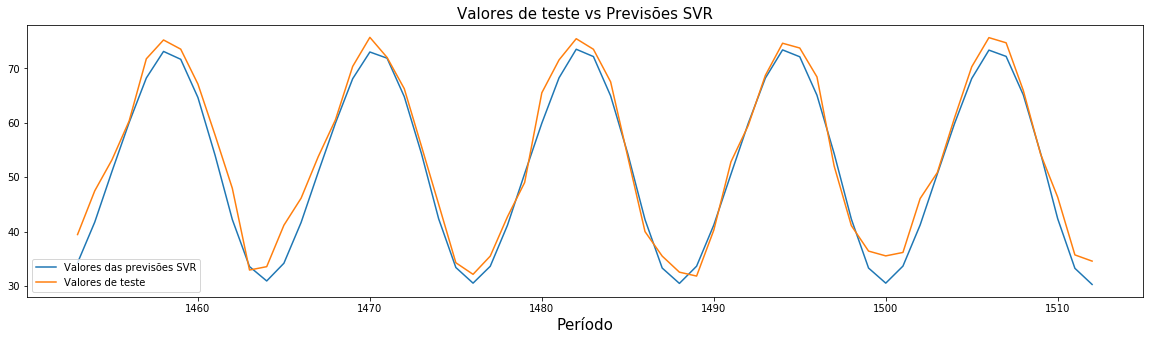

In [279]:
temperatura_previsao4[['Value_Forecast']][1453:].plot(figsize=(20,5))
temperatura_teste['Value'].plot()
plt.legend(['Valores das previsões SVR','Valores de teste'], fontsize=10)
plt.title('Valores de teste vs Previsões SVR',size=15)
plt.xlabel('Período', size=15);

Previsões e os seus intervalos de confiança superior (em vermelho) e inferior (em verde).

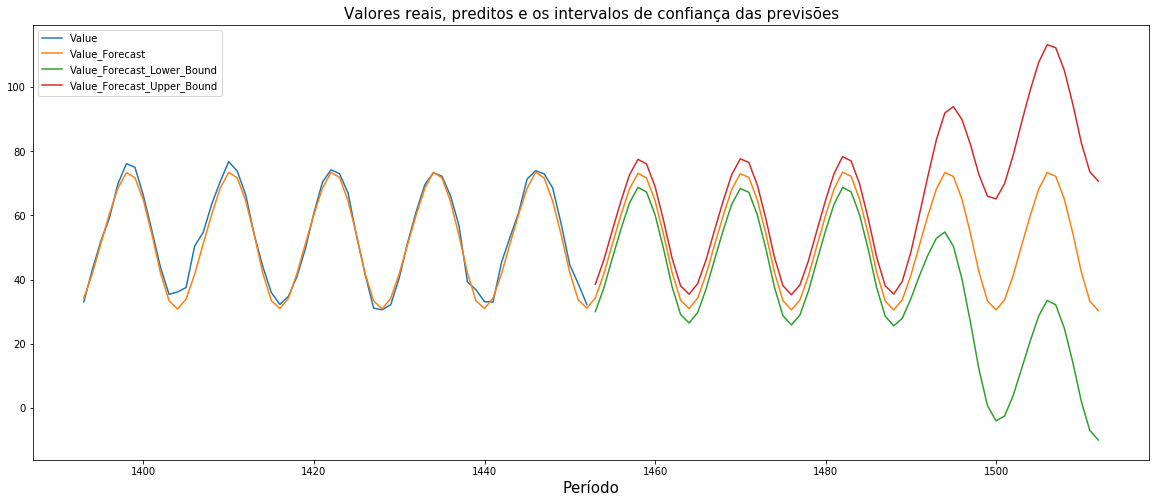

In [317]:
temperatura_previsao4[['Value','Value_Forecast','Value_Forecast_Lower_Bound',
                      'Value_Forecast_Upper_Bound']][1393:].plot(figsize=(20,8))
plt.title('Valores reais, preditos e os intervalos de confiança das previsões', size=15)
plt.xlabel('Período', size=15);
#a medida que o tempo avança os intervalos de confiança das previsões vão tendo uma amplitude maior
#mostrando que as previsões para períodos muito distantes são menos confiáveis.

O Teste de Normalidade Jarque-Bera testa se a distribuição dos dados é uma distribuição normal ($H_{0}$). Caso o *p-valor* do teste seja maior que o nível de significância padrão (0.05), então aceitamos a hipótese nula e os resíduos (diferença entre as previsões e a base de teste) possuem uma distribuição normal.

Conforme abaixo o *p-valor* ficou muito acima de 5%, então os resíduos são normais.

In [316]:
jarque_bera(temperatura_previsao4['Value_Forecast'][1453:] - temperatura_teste['Value'])[1]

0.9604310943315832

Gerando os gráficos padrões do modelo *SVR*.

INFO:pyaf.std:START_PLOTTING
INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 12.438461065292358


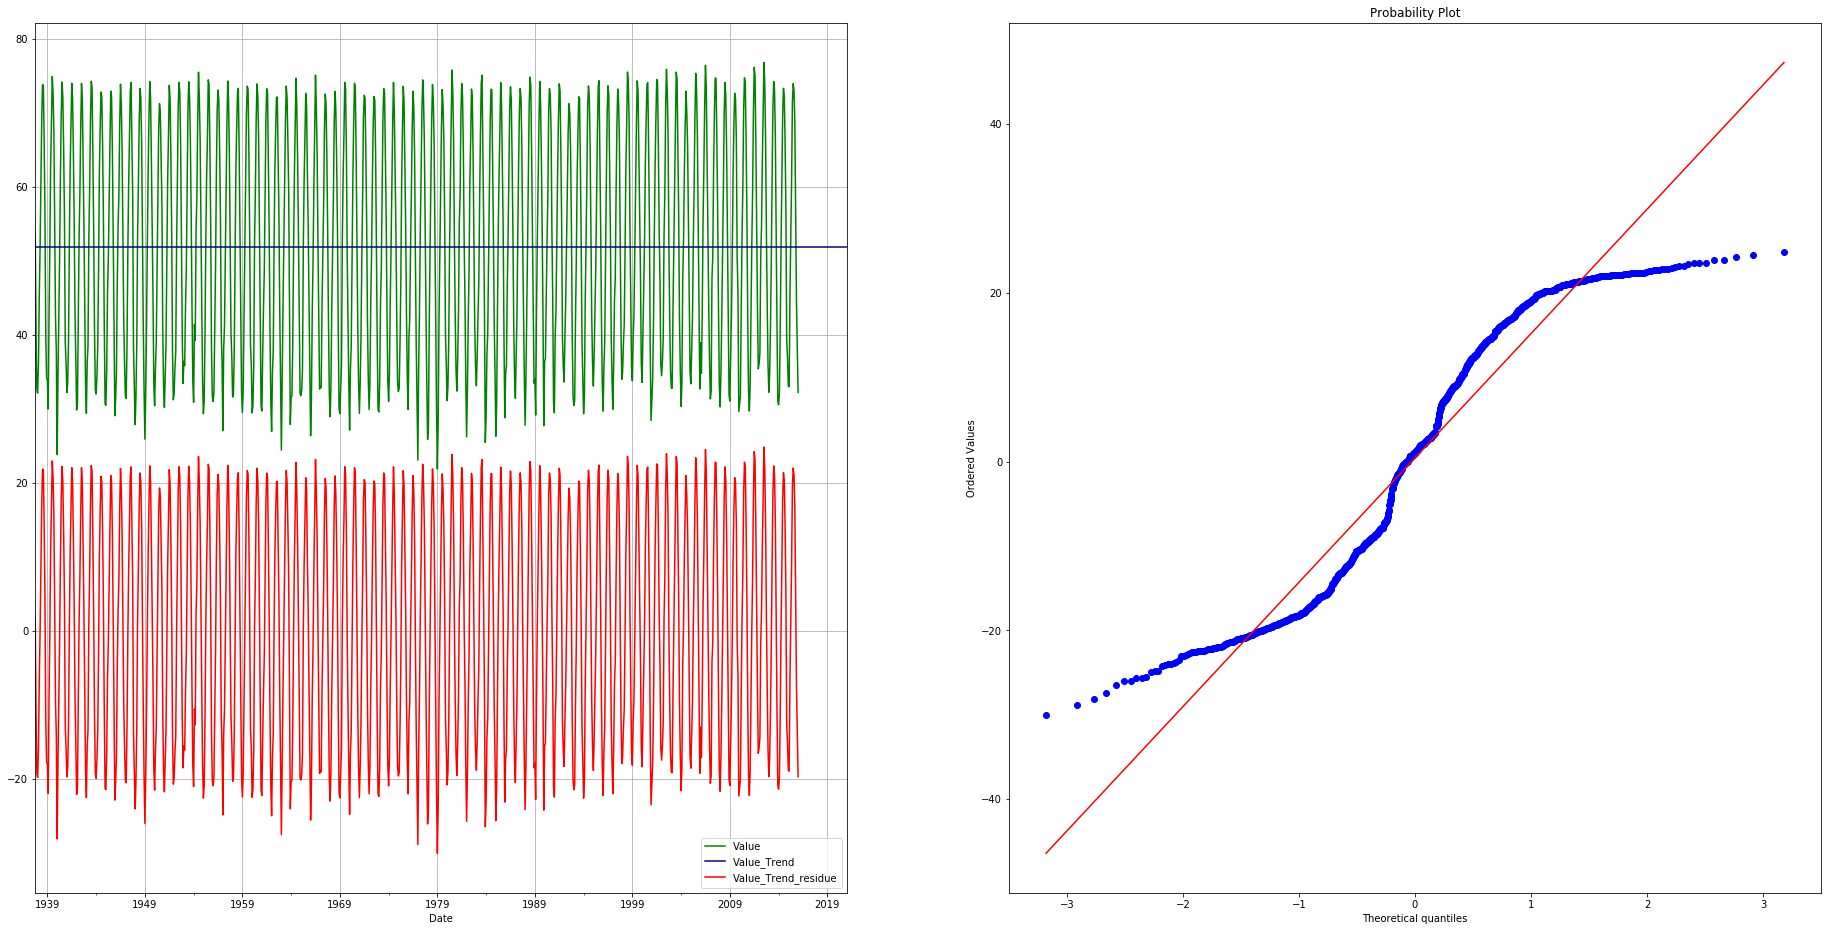

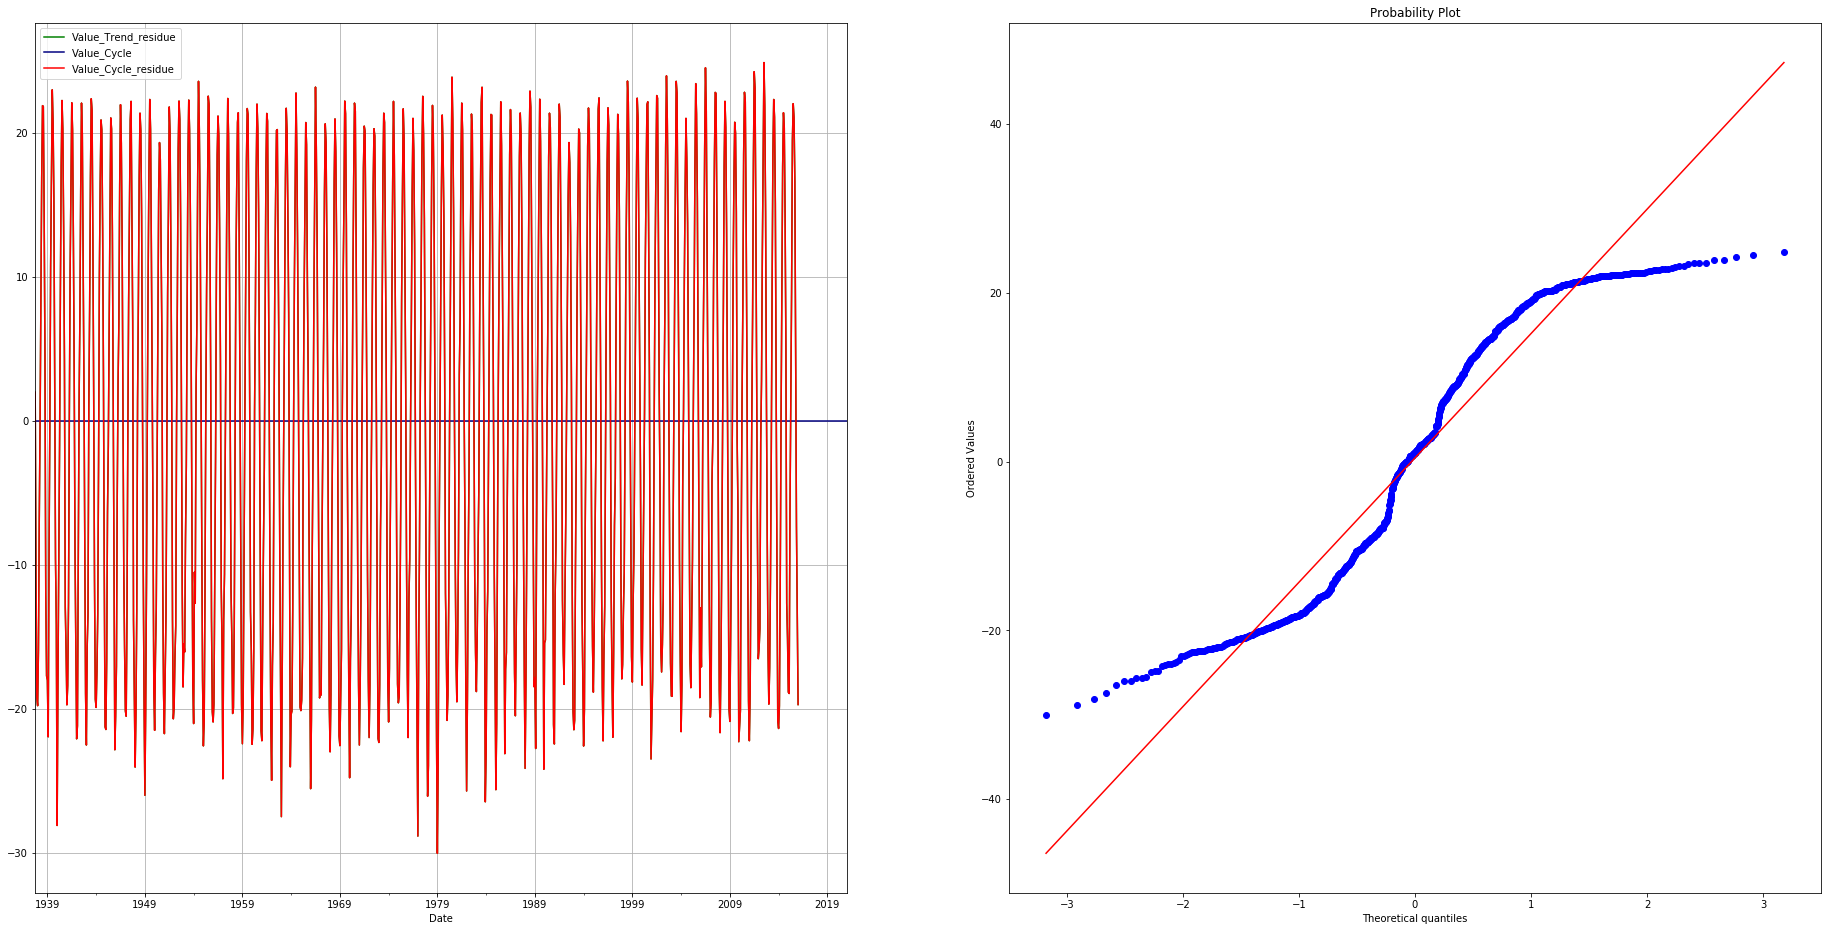

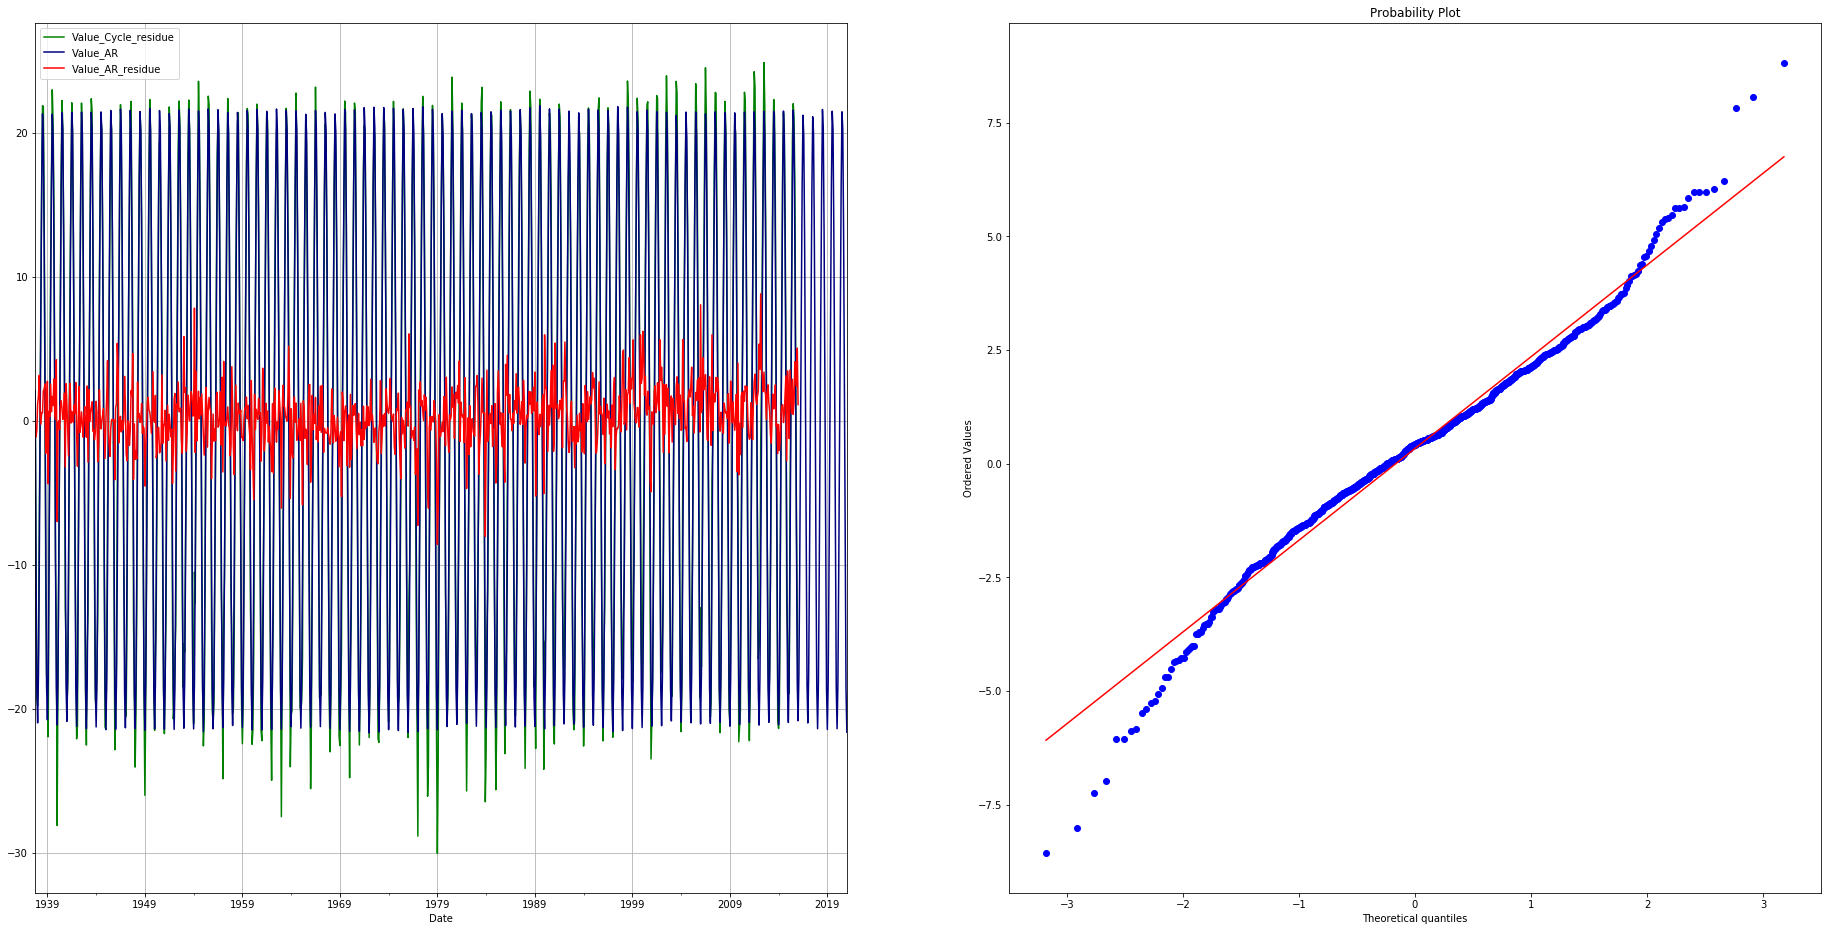

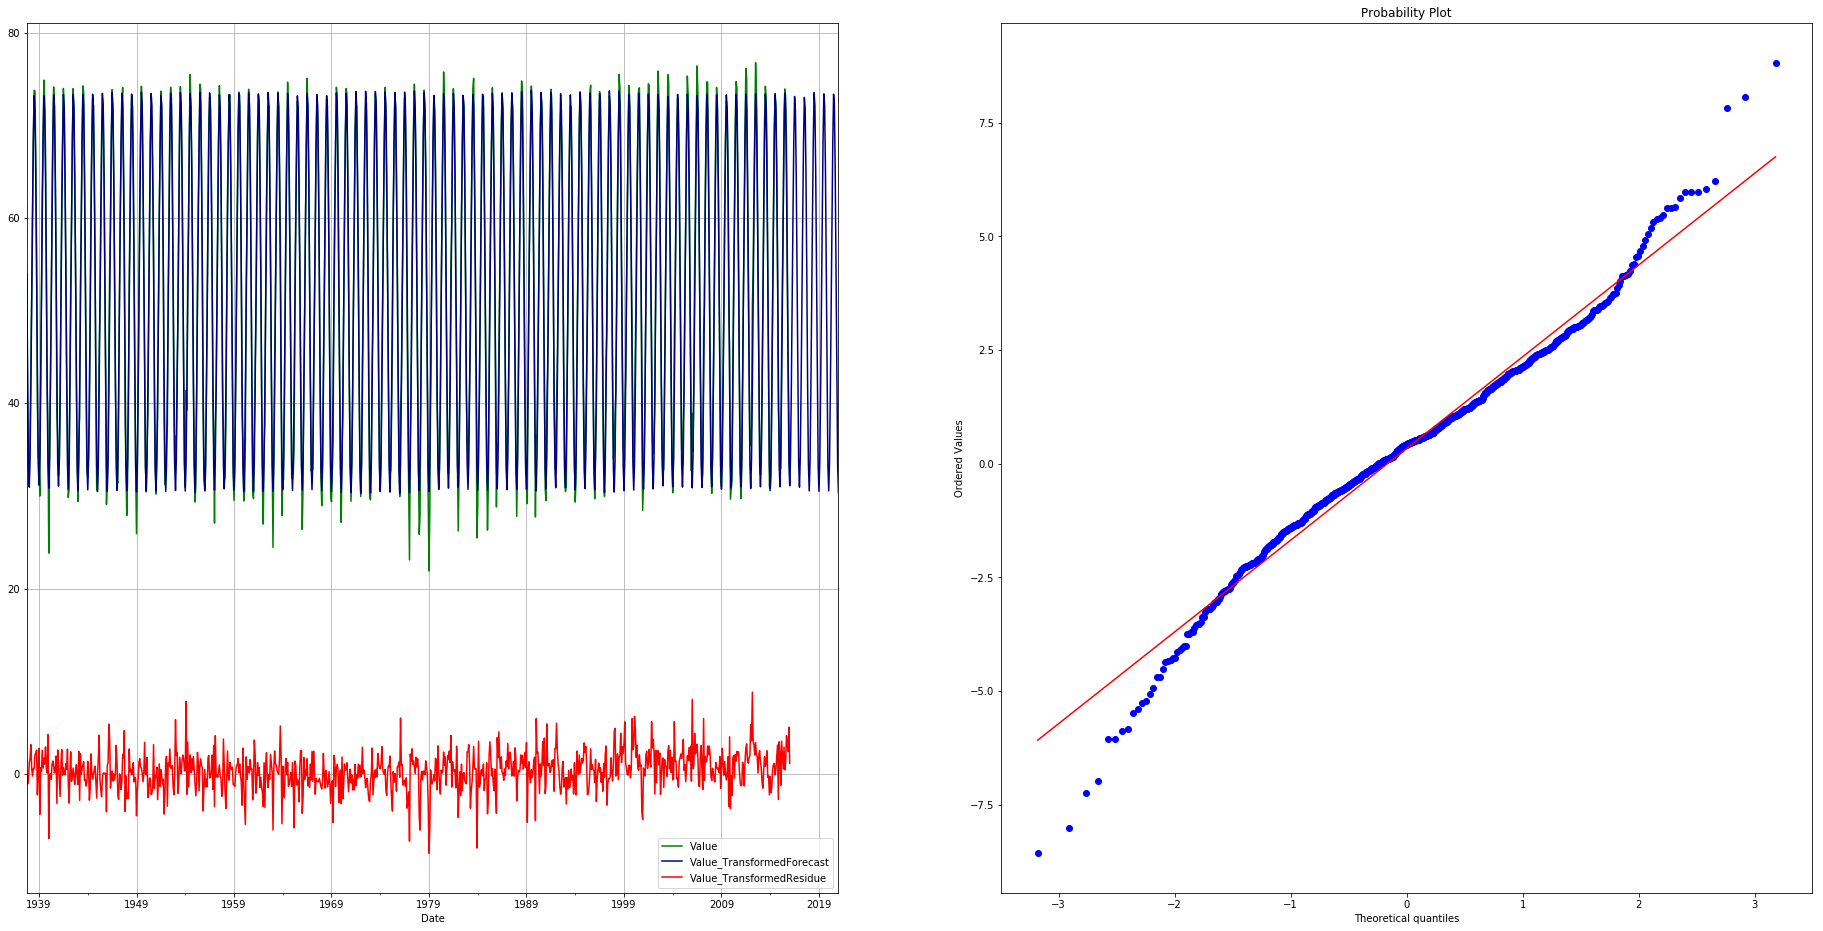

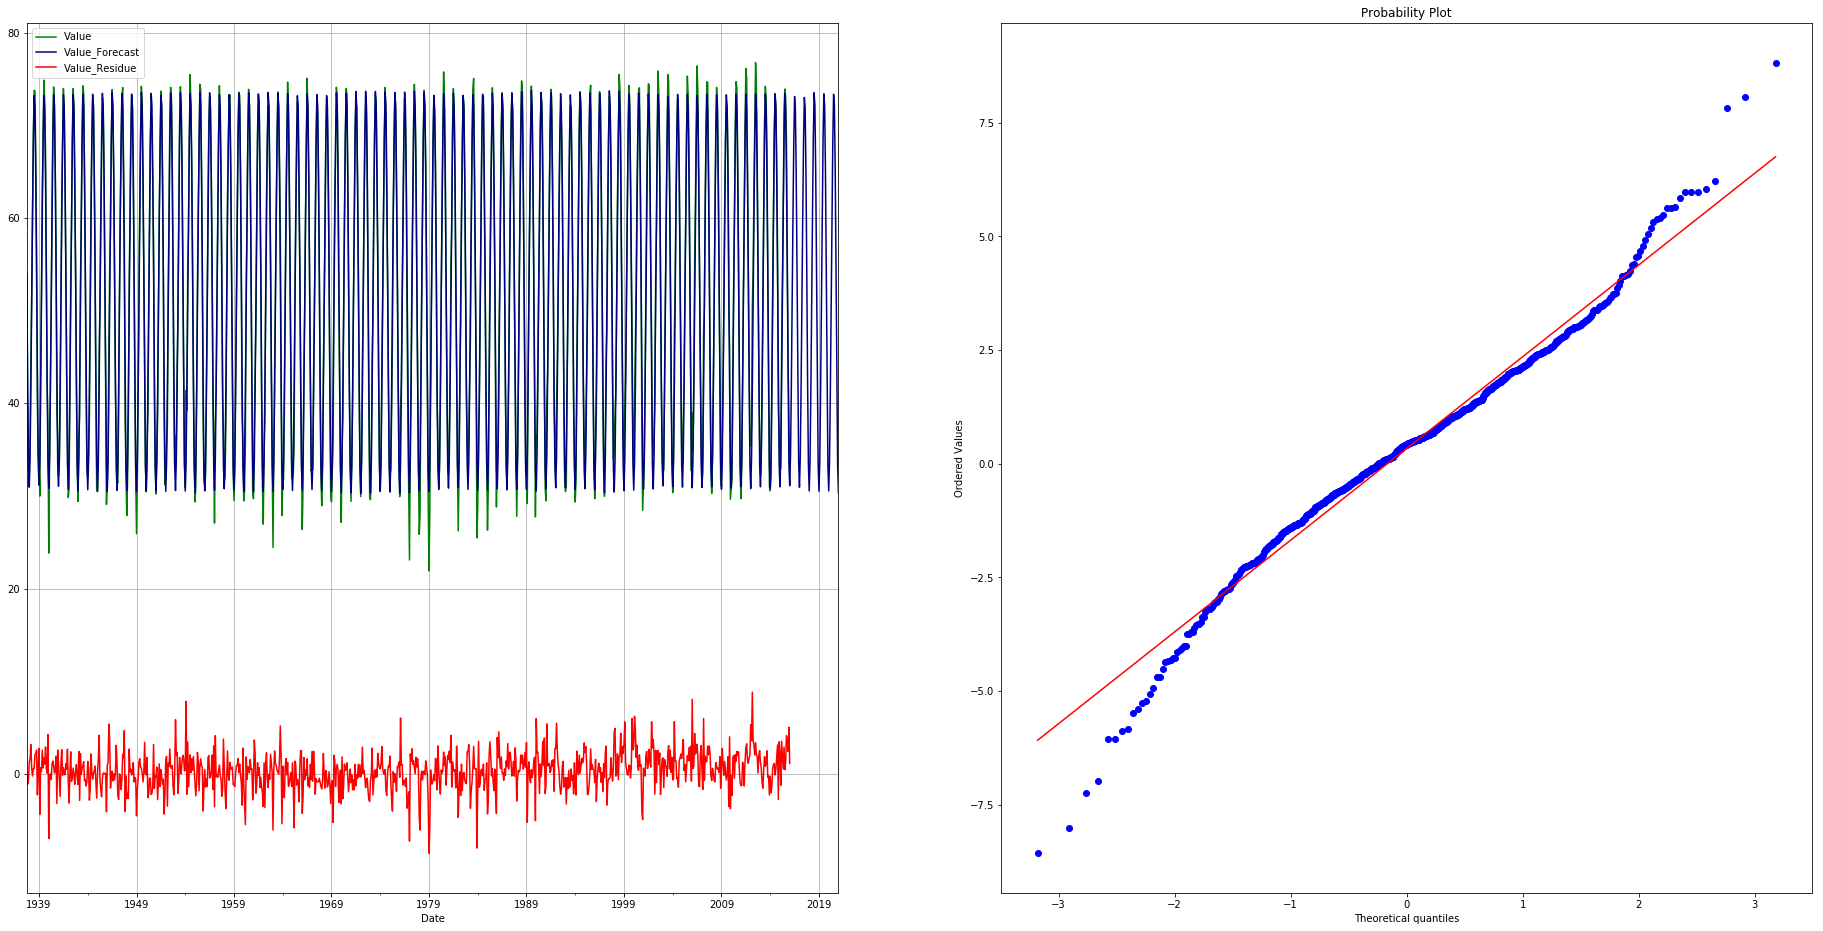

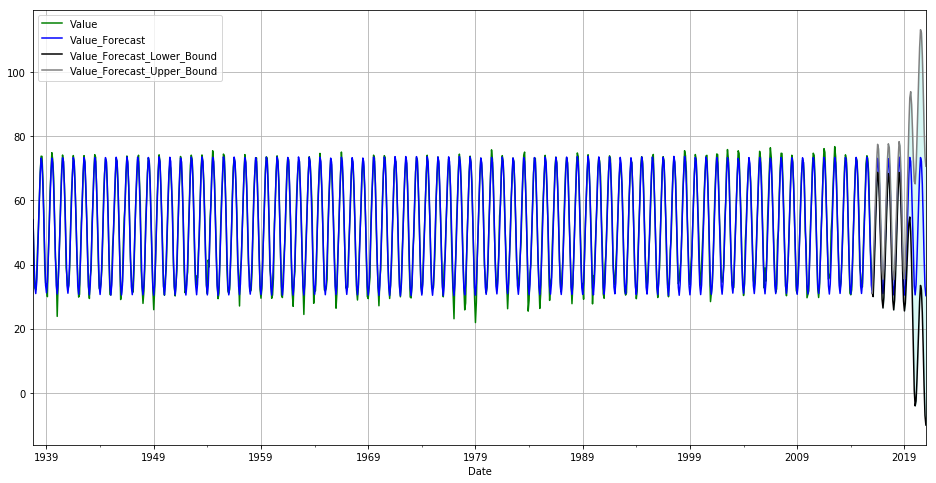

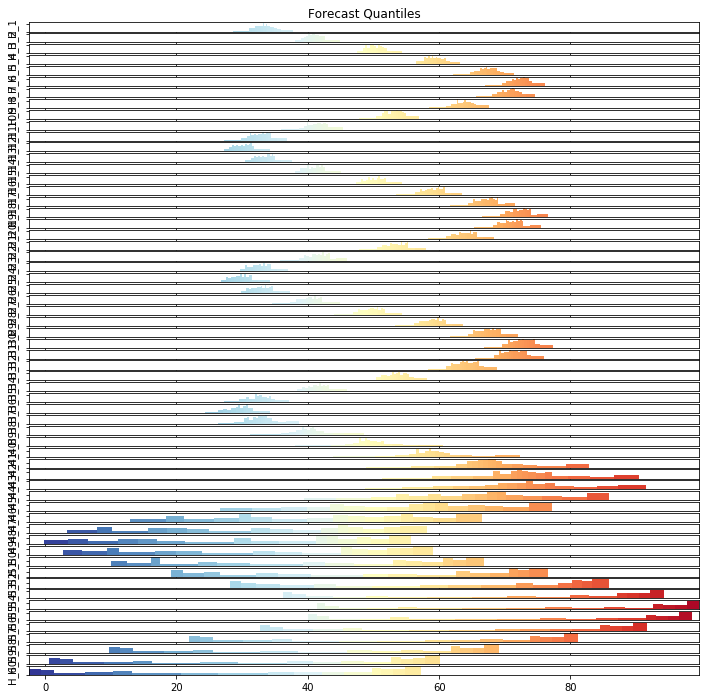

In [288]:
modelo4.standardPlots()

Todos os valores reais e preditos do modelo *SVR*.

In [319]:
temperatura_previsao4.head()

,Date,Value,row_number,Date_Normalized,_Value,_Value_ConstantTrend,_Value_ConstantTrend_residue,_Value_ConstantTrend_residue_zeroCycle,_Value_ConstantTrend_residue_zeroCycle_residue,_Value_ConstantTrend_residue_zeroCycle_residue_SVR(64),...,Value_Forecast_Quantile_44,Value_Forecast_Quantile_50,Value_Forecast_Quantile_56,Value_Forecast_Quantile_62,Value_Forecast_Quantile_68,Value_Forecast_Quantile_74,Value_Forecast_Quantile_80,Value_Forecast_Quantile_86,Value_Forecast_Quantile_92,Value_Forecast_Quantile_98
0,1895-01-01,26.69,0,0.000000,26.69,51.9057,-25.2157,0.0,-25.2157,0.464795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1895-02-01,26.60,1,0.000915,26.60,51.9057,-25.3057,0.0,-25.3057,0.464795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1895-03-01,39.97,2,0.001742,39.97,51.9057,-11.9357,0.0,-11.9357,0.461963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1895-04-01,52.90,3,0.002657,52.90,51.9057,0.9943,0.0,0.9943,0.894146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1895-05-01,59.94,4,0.003542,59.94,51.9057,8.0343,0.0,8.0343,1.578364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Decomposição dos valores do modelo *SVR*.

In [318]:
modelo4.mSignalDecomposition.mTrPerfDetails.head()

,Split,Transformation,Model,Category,Complexity,FitMAPE,ForecastMAPE,TestMAPE
0,None,_Value,_Value_LinearTrend_residue_zeroCycle_residue_S...,NoTransf_LinearTrend_NoCycle_SVR,65,0.0463,0.0345,0.0356
1,None,_Value,_Value_LinearTrend_residue_Seasonal_MonthOfYea...,NoTransf_LinearTrend_Seasonal_MonthOfYear_SVR,77,0.0268,0.0351,0.0337
2,None,_Value,_Value_LinearTrend_residue_bestCycle_byMAPE_re...,NoTransf_LinearTrend_Cycle_SVR,77,0.0268,0.0351,0.0337
3,None,_Value,_Value_PolyTrend_residue_zeroCycle_residue_SVR...,NoTransf_PolyTrend_NoCycle_SVR,67,0.0462,0.0353,0.0372
4,None,_Value,_Value_PolyTrend_residue_Seasonal_MonthOfYear_...,NoTransf_PolyTrend_Seasonal_MonthOfYear_SVR,79,0.0267,0.0353,0.0349


## Retreinando o modelo

Dentre todos os modelos o que teve melhor desempenho foi o *SVR* e por isso ele será usado para gerar previsões para um período de tempo desconhecido. Irei gerar 30 previsões (30 meses).

In [320]:
#gerando o modelo final
modelo4.train(temperatura, 'Date' , 'Value', 30)
#gerando as previsões para um período de tempo desconhecido
temperatura_previsao4_final = modelo4.forecast(temperatura, 30)

INFO:pyaf.std:START_TRAINING 'Value'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['Value']' 21.529664754867554
INFO:pyaf.std:START_FORECASTING '['Value']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Value']' 5.527493476867676


Todos os dados gerados pelo modelo *SVR*.

In [322]:
temperatura_previsao4_final.head()

,Date,Value,row_number,Date_Normalized,_Value,_Value_ConstantTrend,_Value_ConstantTrend_residue,_Value_ConstantTrend_residue_zeroCycle,_Value_ConstantTrend_residue_zeroCycle_residue,_Value_ConstantTrend_residue_zeroCycle_residue_SVR(64),...,Value_Forecast_Quantile_50,Value_Forecast_Quantile_55,Value_Forecast_Quantile_60,Value_Forecast_Quantile_65,Value_Forecast_Quantile_70,Value_Forecast_Quantile_75,Value_Forecast_Quantile_80,Value_Forecast_Quantile_85,Value_Forecast_Quantile_90,Value_Forecast_Quantile_95
0,1895-01-01,26.69,0,0.000000,26.69,51.946113,-25.256113,0.0,-25.256113,0.423532,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1895-02-01,26.60,1,0.000860,26.60,51.946113,-25.346113,0.0,-25.346113,0.423532,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1895-03-01,39.97,2,0.001636,39.97,51.946113,-11.976113,0.0,-11.976113,0.420698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1895-04-01,52.90,3,0.002495,52.90,51.946113,0.953887,0.0,0.953887,0.853514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1895-05-01,59.94,4,0.003327,59.94,51.946113,7.993887,0.0,7.993887,1.539655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Previsões e seus intervalores de confiança (superiores e inferiores).

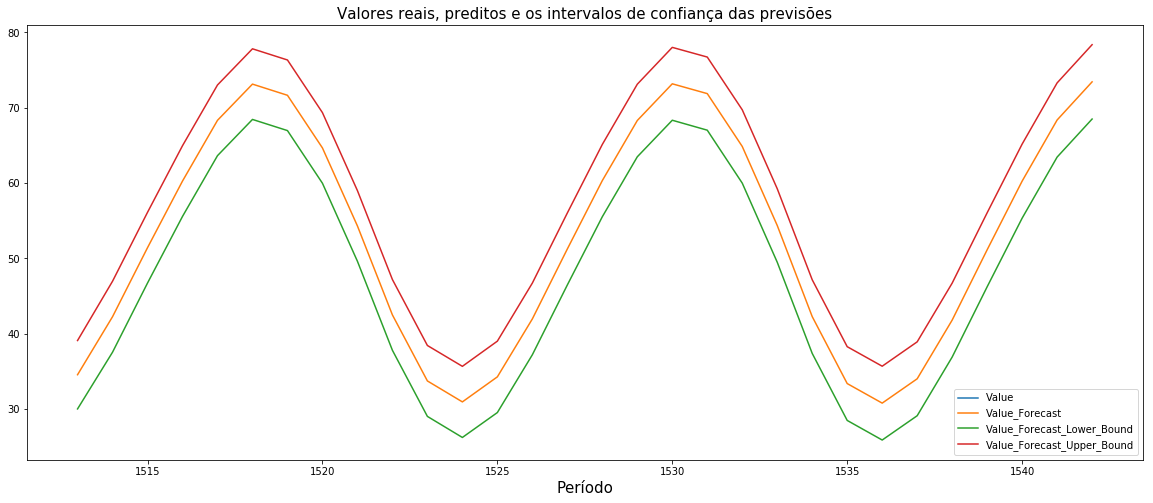

In [325]:
temperatura_previsao4_final[['Value','Value_Forecast','Value_Forecast_Lower_Bound',
                      'Value_Forecast_Upper_Bound']][1513:].plot(figsize=(20,8))
plt.title('Valores reais, preditos e os intervalos de confiança das previsões', size=15)
plt.xlabel('Período', size=15);